In [3]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt

                                         id  Class      area  perimeter  \
0  9bba15ee83cb1926134038a74a0a6f894fceea8a      6  0.189656   1.769499   
1  3ee9a4c0f43c9dbe44da956af504abd57470654d      6  0.279041   2.171049   
2  d22d829efc648eb7d756a37e8f52eb6ee33bb679      6  0.389916   2.588909   
3  1002775257d5cc790f7785b0e5f3c07ff1db6ec7      5  0.115295   1.584079   
4  6d89a7f4211a5d239b7bc85af4f590673c2cb6ea      5  0.086455   1.162746   

      shape  vertices  qc_step1  qc_step2  qc_step3  \
0  1.313785         9         1         0         1   
1  1.344192         6         1         0         1   
2  1.367896         9         1         1         0   
3  1.731944        10         1         1         0   
4  1.244422         6         1         0         1   

                                 submission  author_id  \
0  4381f9078b2704eac4c9ab8c1631439c4ccff939       1667   
1  4381f9078b2704eac4c9ab8c1631439c4ccff939       1667   
2  4381f9078b2704eac4c9ab8c1631439c4ccff939 

<Axes: >

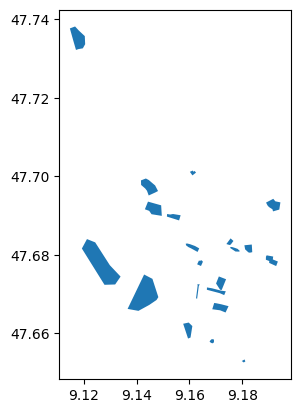

In [1]:
# Pfad zur Shapefile-Datei
shapefile_path = "/Users/richie/Downloads/LCZ/LCZ_Constance/data/4381f9078b2704eac4c9ab8c1631439c4ccff939_auto_qc_polygon.shp"

# Shapefile einlesen
gdf = gpd.read_file(shapefile_path)

# Erste Zeilen anzeigen
print(gdf.head())

# Shapefile plotten (optional)
gdf.plot()


In [4]:
# GeoTIFF-Datei laden
tif_path = "/Users/richie/Projects/smart-green-city-konstanz/richards_notebooks/LCZ/data/4381f9078b2704eac4c9ab8c1631439c4ccff939.tif"

with rasterio.open(tif_path) as src:
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)

CRS: EPSG:4326
Bounds: BoundingBox(left=8.965186535512824, bottom=47.5630993482763, right=9.350563792400099, top=47.8433737169216)


Deine LCZ-Karte ist bereits in WGS 84 (EPSG:4326) gespeichert, das bedeutet:

    Koordinaten sind Längen- & Breitengrade (Dezimalgrad, °)
    X = Longitude (Längengrad), Y = Latitude (Breitengrad)
    Die Karte deckt den Bereich
        Westlichster Punkt: 8.9652°E
        Östlichster Punkt: 9.3506°E
        Südlichster Punkt: 47.5631°N
        Nördlichster Punkt: 47.8434°N

Nun kannst du einen kleineren Ausschnitt extrahieren! 🔍

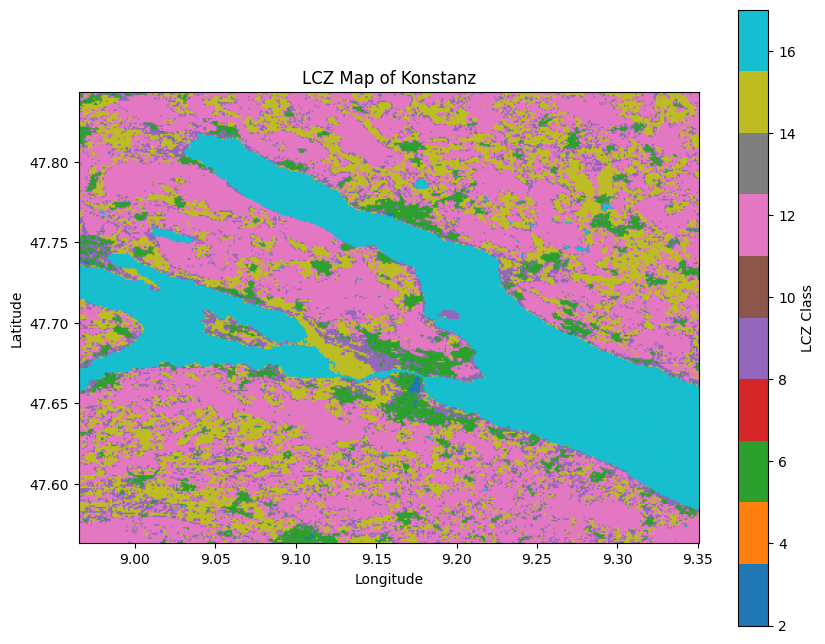

In [1]:
# die geotiff-Datei Öffnen und eine Karte der Stadt Konstanz erstellen 


with rasterio.open(tif_path) as src:
    lcz_data = src.read(1)  # Erstes Band (LCZ-Klassen)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Karte plotten
plt.figure(figsize=(10, 8))
plt.imshow(lcz_data, cmap="tab10", extent=extent)
plt.colorbar(label="LCZ Class")
plt.title("LCZ Map of Konstanz")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

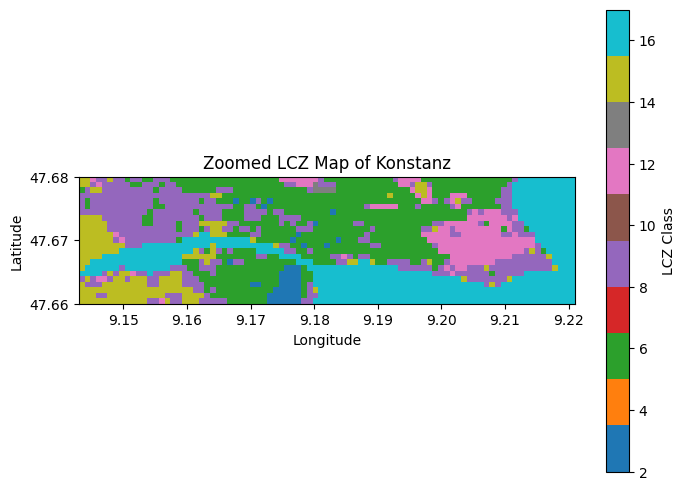

In [5]:
#Hereingezoomt
# Bounding Box für den Zoom (manuell anpassen)
min_x, max_x = 9.143, 9.221
min_y, max_y = 47.66, 47.68

# Pixel-Koordinaten der Bounding Box berechnen
row_min, col_min = src.index(min_x, max_y)  # Oben links
row_max, col_max = src.index(max_x, min_y)  # Unten rechts

# Ausschnitt extrahieren
lcz_crop = lcz_data[row_min:row_max, col_min:col_max]

# Neue Extent-Koordinaten berechnen
extent_crop = [min_x, max_x, min_y, max_y]

# Gezoomte Karte plotten
plt.figure(figsize=(8, 6))
plt.imshow(lcz_crop, cmap="tab10", extent=extent_crop)
plt.colorbar(label="LCZ Class")
plt.title("Zoomed LCZ Map of Konstanz")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

mega verpixelt: Für mehr Details bräuchtest du eine hochauflösendere LCZ-Karte.